# Applied Statistics Project
*****

## Introduction

## Imports

In [116]:
# Standard mathematical functions
# https://docs.python.org/3/library/math.html
import math

# Numerical structures asnd operations
# https://numpy.org/doc/stable/user/index.html#user
import numpy as np

# Permutations and combinations
# https://docs.python.org/3/library/itertools.html
import itertools

# Generate pseudo-random numbers
# https://docs.python.org/3/library/random.html
import random

# Create plots
# https://matplotlib.org/stable/users/index.html
import matplotlib.pyplot as plt

## Problem 1: Extending the Lady Tasting Tea 

The goal here is to extend the original lady tasting tea experiment (<i>Fisher, 1935</i>), where a participant is presented with a set of randomly-shuffled cups of tea and claims to be able to tell which cups had the milk poured in before the tea. The original experiment used 8 cups of tea (4 with the tea poured first and 4 with the milk poured first). We are going to use 12 cups (8 tea-first and 4 milk-first), and calculate the probability of the participant correctly identifying the preparation method for each cup.

### Prepare the cups

In [117]:
# number of cups
n_cups = 12

# number of cups with milk added first
cups_milk_first = 4

# number of cups with tea added first
cups_tea_first = 8

### Calculating possible combinations

In mathematics, the choose function allows us to calculate the number of possible combinations when selecting <i>n</i> objects from a set of <i>k</i> objects  without order and without repetition i.e. each object can only be selected once.

![combination formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/0f4e3f6d2dc3075f5569c82118fad11c32dff393)

#### Calculating possible combinations using math.factorial

The [math.factorial](https://docs.python.org/3/library/math.html#math.factorial) function allows us to easily make the calculations necessary for the choose function.

In [118]:
# total number of cups
n = 12

# number of cups with milk first
k = 4

In [119]:
math.factorial(n)

479001600

In [120]:
math.factorial(k)

24

In [121]:
math.factorial(n-k)

40320

In [122]:
# using the choose function
math.factorial(n)//(math.factorial(k)*math.factorial(n-k))

495

#### Calculating possible combinations using math.comb

The [math.comb](https://docs.python.org/3/library/math.html#math.comb) function condenses the above steps into one.

In [123]:
# number of possible combinations when selecting 8 cups from the 12 presented
combinations = math.comb(n_cups, cups_milk_first)
combinations

495

### Ordering the Results

In [124]:
#label the cups
labels = list(range(n_cups))
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
# show how many unique ways there are of selecting cups_milk_first from n_cups
combs = list(itertools.combinations(labels, cups_milk_first))
len(combs)

495

In [126]:
# shuffle the prepared cups
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html
np.random.shuffle(labels)
labels

[3, 2, 11, 8, 9, 4, 5, 7, 10, 0, 1, 6]

In [127]:
# select 4 cups
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
choice = np.random.choice(labels, size = 4, replace = False)
choice

array([0, 5, 7, 1])

In [128]:
# calculate the overlap between each element of combs and choice
overlaps_amount = []
for comb in combs:
    # Turn comb into a set
    set1 = set(comb)
    # Turn choice into a set
    set2 = set(choice)
    # See if they overlap
    overlap = set1.intersection(set2)
    # Show the combination and the overlap
    print(comb, len(overlap), overlap)
    # Append the overlap to overlaps_amount
    overlaps_amount.append(len(overlap))

(0, 1, 2, 3) 2 {np.int64(0), np.int64(1)}
(0, 1, 2, 4) 2 {np.int64(0), np.int64(1)}
(0, 1, 2, 5) 3 {np.int64(0), np.int64(1), np.int64(5)}
(0, 1, 2, 6) 2 {np.int64(0), np.int64(1)}
(0, 1, 2, 7) 3 {np.int64(0), np.int64(1), np.int64(7)}
(0, 1, 2, 8) 2 {np.int64(0), np.int64(1)}
(0, 1, 2, 9) 2 {np.int64(0), np.int64(1)}
(0, 1, 2, 10) 2 {np.int64(0), np.int64(1)}
(0, 1, 2, 11) 2 {np.int64(0), np.int64(1)}
(0, 1, 3, 4) 2 {np.int64(0), np.int64(1)}
(0, 1, 3, 5) 3 {np.int64(0), np.int64(1), np.int64(5)}
(0, 1, 3, 6) 2 {np.int64(0), np.int64(1)}
(0, 1, 3, 7) 3 {np.int64(0), np.int64(1), np.int64(7)}
(0, 1, 3, 8) 2 {np.int64(0), np.int64(1)}
(0, 1, 3, 9) 2 {np.int64(0), np.int64(1)}
(0, 1, 3, 10) 2 {np.int64(0), np.int64(1)}
(0, 1, 3, 11) 2 {np.int64(0), np.int64(1)}
(0, 1, 4, 5) 3 {np.int64(0), np.int64(1), np.int64(5)}
(0, 1, 4, 6) 2 {np.int64(0), np.int64(1)}
(0, 1, 4, 7) 3 {np.int64(0), np.int64(1), np.int64(7)}
(0, 1, 4, 8) 2 {np.int64(0), np.int64(1)}
(0, 1, 4, 9) 2 {np.int64(0), np.int6

In [129]:
count = np.unique(overlaps_amount, return_counts = True)
count

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

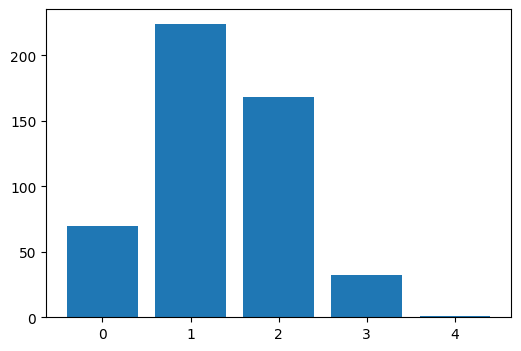

In [130]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.bar(count[0], count[1]);

### Null Hypothesis

1. The participant has no special ability to discern the preparation method for each cup
2. The participant is selecting 4 cups at random and declaring them to have been prepared with the milk added before the tea infusion.

### Alternate Hypothesis

1. The participant is able to identify the cups which were prepared with the milk added before the tea infusion.

The probability that the participant will correctly identify the 4 cups with milk added first is 1/495, if they are selecting cups at random. If they do select the correct 4 cups, it is so unlikley that they would have done this by random chance that there is likely something non-random happening when they are making their selection.

In [131]:
# probability of participant randomly selecting 4 correct cups
1/495

0.00202020202020202

In [132]:
# probability of randomly selecting at least 3 correct cups
(32+1)/495

0.06666666666666667

## Problem 2: Normal Distribution

generate 100,000 samples of size 10 from standard normal distribution

compute standard deviation with ddof=1 and ddof=0 for each sample

plot histograms of both sets of values on the same axes with transparency

describe differences

explain how differences are expected to change with larger sample sizes

## Problem 3: t-Tests

## Problem 4: ANOVA

### References

*****
# End